<a href="https://colab.research.google.com/github/BenzterBit/DL-QSTP-Codes/blob/master/cifar10CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision import datasets , transforms
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
import os




In [106]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root='./data', train = True , download = True ,transform=transform)

train_loader = torch.utils.data.DataLoader(trainset , batch_size = 4 , shuffle = True )

testset = datasets.CIFAR10( root='./data' , train = False , download = True ,transform=transform)

test_loader = torch.utils.data.DataLoader(testset, batch_size = 4 , shuffle = False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


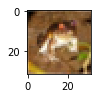

frog


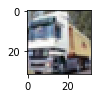

truck


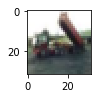

truck


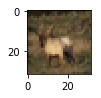

deer


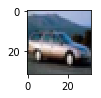

car


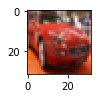

car


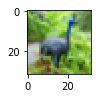

bird


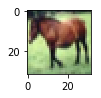

horse


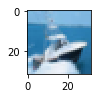

ship


In [107]:
def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

 
for i in range(9):
  plt.subplot(331 + i)
  imshow(trainset[i][0])
  print(classes[trainset[i][1]])

In [130]:

input_channel = 3
output_channel = 16 
kernel_size = 5
stride = 1
padding =2 
hidden_layer = 512

class CNNModel(nn.Module):
  def __init__(self,input_channel,output_channel,kernel_size,stride,padding,hidden_layer):
    super(CNNModel,self).__init__()
    
    self.cnn1 = nn.Conv2d(in_channels=input_channel,out_channels=output_channel,kernel_size=kernel_size,stride=stride,padding=padding)
    self.relu1 = nn.ReLU()
    
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    
    self.cnn2 = nn.Conv2d(in_channels=output_channel,out_channels=32,kernel_size=kernel_size,stride=stride,padding=padding)
    self.relu2 = nn.ReLU()
    
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    
    self.fc1 = nn.Linear(32*8*8,hidden_layer)
    self.frelu1 = nn.ReLU()
    
    self.fc2 = nn.Linear(hidden_layer , 10)
    
  def forward(self,x):
    out = self.cnn1(x)
    out = self.relu1(out)
    out= self.maxpool1(out)
    out = self.cnn2(out)
    out = self.relu2(out)
    out= self.maxpool2(out)
    out = self.fc1(out)
    out = self.frelu1(out)
    out = self.fc2(out)
    
    return out
  
model = CNNModel(input_channel,output_channel,kernel_size,stride,padding,hidden_layer)
model.cuda()
    

CNNModel(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [131]:
n = len(list(model.parameters()))
for i in range(n):
  print(list(model.parameters())[i].size())

torch.Size([16, 3, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 512])
torch.Size([10])


In [0]:
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(),lr = 0.00012345)



In [133]:
epoch = 2 
iter = 1 

for i in range(epoch):
  for j,(images,labels) in enumerate(train_loader):
    images = Variable(images.view(images.shape[0],images.shape[1],images.shape[2],images.shape[3]).cuda())
    labels = Variable(labels.cuda())
    
    optimiser.zero_grad()
    
    output = model(images)
    
    loss = criterion(output,labels)
    loss.backward()
    
    optimiser.step()
    
  correct =0
  total = 0
  
  for images,labels in test_loader:
    images = Variable(images.view(images.shape[0],images.shape[1],images.shape[2],images.shape[3]).cuda())
    
    outputs = model(images)
    
    _,predicted = torch.max(outputs.data,1)
    
    total += labels.size[0]
    
    correct += (predicted.cpu()==labels.cpu()).sum()
    
  accuracy = correct*100/total
  print("epoch : {} , accuracy : {}".format(iter,accuracy))
  iter+=1
        
  
    
  
    
  

RuntimeError: ignored